In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import contractions
from unidecode import unidecode
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from rake_nltk import Rake
import yake
from nltk.stem import WordNetLemmatizer,LancasterStemmer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
import yake
from rake_nltk import Rake
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
df=pd.read_csv(r"C:\Users\kannu\OneDrive\Desktop\Pandas_csvs\Datasets\sentiment_analysis\Hotel_final_df\Hotel_Reviews.csv")

In [3]:
df.shape

(515738, 17)

In [4]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
df[["Negative_Review","Positive_Review"]].isna().sum()

Negative_Review    0
Positive_Review    0
dtype: int64

In [6]:
df["Positive_Review"].value_counts()

No Positive                                                                                                    35946
 Location                                                                                                       9222
 Everything                                                                                                     2284
 location                                                                                                       1677
 Nothing                                                                                                        1243
                                                                                                               ...  
 The rooms and staff were amazing                                                                                  1
 The entire package                                                                                                1
 The hotel is very clean rooms are big                          

In [7]:
[word for word in df["Positive_Review"] if len(word)<14]

['No Positive',
 'No Positive',
 ' Massive bed',
 ' Large bed ',
 'No Positive',
 ' Location',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 ' nothing',
 ' The hall',
 'No Positive',
 ' Good Wi fi ',
 'No Positive',
 'No Positive',
 ' nothing',
 ' everything ',
 'No Positive',
 ' Everything',
 ' Breakfast',
 ' Nothing else',
 'No Positive',
 ' breakfast',
 'No Positive',
 ' Food was ok',
 'No Positive',
 ' Not much',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 ' EVERYTHING ',
 'No Positive',
 ' The location',
 'No Positive',
 ' Quiet room',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 ' Very little',
 'No Positive',
 'No Positive',
 ' Location',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',
 ' All of it ',
 'No Positive',
 'No Positive',
 ' wonderful',
 'No Positive',
 'No Positive',
 'No Positive',
 'No Positive',

In [8]:
pos=df[["Positive_Review"]]
pos.columns=["Review"]
pos["Target"]=np.ones(len(pos),dtype=int)
        
        
                           
                           

C:\Users\kannu\AppData\Local\Temp\ipykernel_14848\2699692401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos["Target"]=np.ones(len(pos),dtype=int)


In [9]:
for ind,data in enumerate (pos["Review"]):
    if ((len(data)<14) and ((data.lower().__contains__("nothing")) or (data.lower().__contains__("no positive")))):
        pos["Target"].iloc[ind]=2

C:\Users\kannu\AppData\Local\Temp\ipykernel_14848\3665317887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos["Target"].iloc[ind]=2


In [10]:
a=" nothing"
b=" Nothing"
c="nothing"
a.lower().__contains__("nothing")
b.lower().__contains__("nothing")
c.lower().__contains__("nothing")

True

In [11]:
pos["Target"].value_counts()

1    478023
2     37715
Name: Target, dtype: int64

In [12]:
neg=df[["Negative_Review"]]
neg.columns=["Review"]
neg["Target"]=np.zeros(len(neg),dtype=int)

C:\Users\kannu\AppData\Local\Temp\ipykernel_14848\1931164354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg["Target"]=np.zeros(len(neg),dtype=int)


In [13]:
# [word for word in neg["Review"] if len(word)<14]

In [14]:
for ind,data in enumerate (neg["Review"]):
    if ((len(data)<14) and ((data.lower().__contains__("nothing")) or (data.lower().__contains__("no negative") or (data.lower().__contains__("n a")) or (data.lower().__contains__("nil")) or (data.lower().__contains__("no dislikes"))))):
        neg["Target"].iloc[ind]=2

C:\Users\kannu\AppData\Local\Temp\ipykernel_14848\2561361222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg["Target"].iloc[ind]=2


In [15]:
neg["Target"].value_counts()

0    364220
2    151518
Name: Target, dtype: int64

In [16]:
neg_df=neg.sample(500)
neg_df.shape

(500, 2)

In [17]:
pos_df=pos.sample(500)

In [18]:
final_df=pd.concat([pos_df,neg_df],axis=0)

In [19]:
final_df.isna().sum()

Review    0
Target    0
dtype: int64

In [20]:
final_df.reset_index(drop=True,inplace=True)

In [21]:
final_df["Target"].value_counts()
x=final_df.drop("Target",axis=1)
y=final_df["Target"]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=25,stratify=y)
x_train.shape,x_test.shape,y_train.shape

((800, 1), (200, 1), (800,))

In [23]:
#Removing white spaces

def whitespace_removal(data):
    import re
    pattern=r"\s+"
    res=re.sub(pattern," ",data)
    return res

#contraction mapping

def expand_text(data):
    res=contractions.fix(data)
    return res

#accented character handling

def accent_handling(data):
    res=unidecode(data)
    return res


In [24]:
x_train

,Review
276,The facilities in the room and pool were exce...
8,Everything
806,My cosy room on this occasion was much more c...
776,We did not have a bad experience but felt it ...
21,Cleanness and deco
...,...
649,But would be much better if the hot food was ...
79,Tram stop in the front of the hotel convenien...
604,Breakfast could be better
736,No Negative


In [25]:
x_train["Review"]=x_train["Review"].apply(whitespace_removal)
x_train["Review"]=x_train["Review"].apply(expand_text)
x_train["Review"]=x_train["Review"].apply(accent_handling)

In [26]:
#datacleaning

stopword_list=stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("nor")
stopword_list.remove("not")


def cleaning(data):
    res=[word.lower() for word in word_tokenize(data) if (word.lower() not in stopword_list) and (word not in punctuation) and (word.isalpha() and (len(word)>1))]
    return res

In [27]:
x_train_cleaned=x_train["Review"].apply(cleaning)
x_train_cleaned.reset_index(drop=True,inplace=True)
x_train_cleaned

0                    [facilities, room, pool, excellent]
1                                           [everything]
2      [cosy, room, occasion, much, cosy, previous, s...
3      [not, bad, experience, felt, somehow, disappoi...
4                                      [cleanness, deco]
                             ...                        
795    [would, much, better, hot, food, kept, hot, ra...
796    [tram, stop, front, hotel, convenient, direct,...
797                           [breakfast, could, better]
798                                       [no, negative]
799    [overpriced, smelly, dirty, dusty, toilet, nas...
Name: Review, Length: 800, dtype: object

In [28]:
#EDA 
#ngrams

def ngram(data,n_range):
    ngram_list=[]
    op=ngrams(data,n_range)
    for ng in op:
        ngram_list.append(ng)
        
    return ngram_list
        

In [29]:
y_train.reset_index(drop=True,inplace=True)

In [30]:
#checking positive reviews

merged_data_for_ngrams=pd.concat([x_train_cleaned,y_train],axis=1)
pos=merged_data_for_ngrams.loc[merged_data_for_ngrams["Target"]==1]["Review"]
pos

0                    [facilities, room, pool, excellent]
1                                           [everything]
4                                      [cleanness, deco]
5                                          [room, clean]
7      [bar, floor, like, position, near, beach, plus...
                             ...                        
788    [great, place, stay, great, location, definite...
789    [well, presented, hotel, friendly, helpful, st...
792                                  [location, perfect]
794              [location, lighting, ac, system, rooms]
796    [tram, stop, front, hotel, convenient, direct,...
Name: Review, Length: 368, dtype: object

In [31]:
y_train.index

RangeIndex(start=0, stop=800, step=1)

In [32]:
pos.apply(lambda x: ngram(x,4)).iloc[8]

[]

In [33]:
pos.isna().sum()

0

In [34]:
merged_data_for_ngrams

,Review,Target
0,"[facilities, room, pool, excellent]",1
1,[everything],1
2,"[cosy, room, occasion, much, cosy, previous, s...",0
3,"[not, bad, experience, felt, somehow, disappoi...",0
4,"[cleanness, deco]",1
...,...,...
795,"[would, much, better, hot, food, kept, hot, ra...",0
796,"[tram, stop, front, hotel, convenient, direct,...",1
797,"[breakfast, could, better]",0
798,"[no, negative]",2


In [35]:
#checking negative reviews

neg=merged_data_for_ngrams.loc[merged_data_for_ngrams["Target"]==0]["Review"]
neg.apply(lambda x: ngram(x,4)).iloc[7]

[('children', 'shared', 'twin', 'room'),
 ('shared', 'twin', 'room', 'floor'),
 ('twin', 'room', 'floor', 'tea'),
 ('room', 'floor', 'tea', 'coffee'),
 ('floor', 'tea', 'coffee', 'supply'),
 ('tea', 'coffee', 'supply', 'not'),
 ('coffee', 'supply', 'not', 'replenished')]

In [36]:
#checking neutral reviews

neutral=merged_data_for_ngrams.loc[merged_data_for_ngrams["Target"]==2]["Review"]
neutral.apply(lambda x: ngram(x,1)).iloc[17]

[('no',), ('negative',)]

In [37]:
def text(data):
    return " ".join(data)

pos_string=pos.apply(text)
neg_string=neg.apply(text)
neutral_string=neutral.apply(text)

In [38]:
def df_2_string(df):
    final_text=[]
    list1=df.to_list()
    for sub_list in list1:
        val="".join(sub_list)
        
        final_text.append(val)
    return "".join(final_text)
        

In [39]:
pos_text=df_2_string(pos_string)
neg_text=df_2_string(neg_string)
neutral_text=df_2_string(neutral_string)


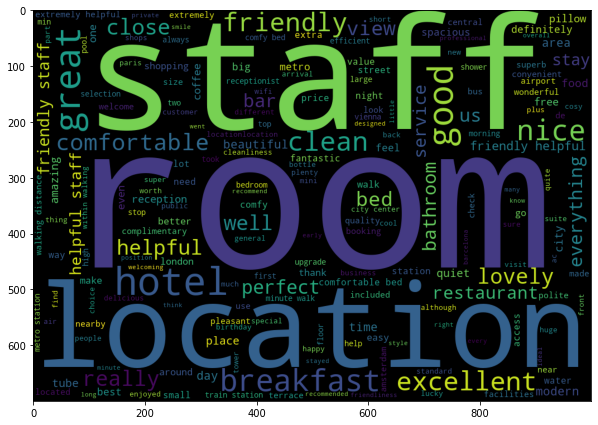

In [40]:
#wordcloud of pos reviews
word_cloud_pos=WordCloud(height=700,width=1000,background_color="black",min_font_size=8).generate(pos_text)
plt.figure(figsize=(10,16))
plt.imshow(word_cloud_pos)
plt.show()


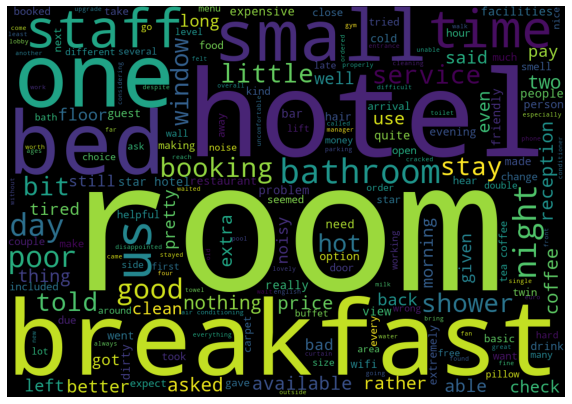

In [41]:
#wordcloud of pos reviews
word_cloud_neg=WordCloud(height=700,width=1000,background_color="black",min_font_size=8).generate(neg_text)
plt.figure(figsize=(10,16))
plt.imshow(word_cloud_neg)
plt.axis("off")
plt.show()

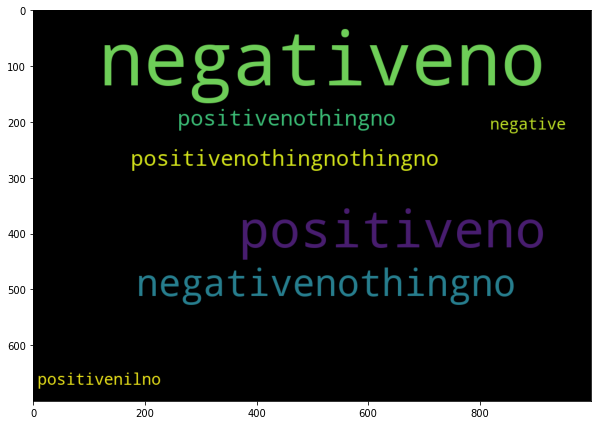

In [42]:
#wordcloud of pos reviews
word_cloud_neutral=WordCloud(height=700,width=1000,background_color="black",min_font_size=8).generate(neutral_text)
plt.figure(figsize=(10,16))
plt.imshow(word_cloud_neutral)
plt.show()

In [43]:
#lemmatization and stemming

def lemmatization(data):
    final_text=[]
    for word in data:
        lemmatizer=WordNetLemmatizer()
        lema=lemmatizer.lemmatize(word)
        final_text.append(lema)
    return " ".join(final_text)

def stemming(data):
    final_text=[]
    for word in data:
        stemmer=LancasterStemmer()
        stem=stemmer.stem(word)
        final_text.append(stem)
    return " ".join(final_text)


In [44]:
lemmatized=x_train_cleaned.apply(lemmatization)
stemmed=x_train_cleaned.apply(stemming)

In [45]:
lemmatized

0                           facility room pool excellent
1                                             everything
2      cosy room occasion much cosy previous stay inf...
3           not bad experience felt somehow disappointed
4                                         cleanness deco
                             ...                        
795    would much better hot food kept hot rather lef...
796    tram stop front hotel convenient direct access...
797                               breakfast could better
798                                          no negative
799    overpriced smelly dirty dusty toilet nasty roo...
Name: Review, Length: 800, dtype: object

In [46]:
stemmed

0                                  facil room pool excel
1                                                everyth
2      cosy room occas much cosy prevy stay info comp...
3                 not bad expery felt somehow disappoint
4                                               cle deco
                             ...                        
795    would much bet hot food kept hot rath left coo...
796    tram stop front hotel conveny direct access ci...
797                                  breakfast could bet
798                                               no neg
799    overpr smel dirty dusty toilet nasty room disg...
Name: Review, Length: 800, dtype: object

In [47]:
#will use lemmatized.

In [48]:
x_train_cleaned

0                    [facilities, room, pool, excellent]
1                                           [everything]
2      [cosy, room, occasion, much, cosy, previous, s...
3      [not, bad, experience, felt, somehow, disappoi...
4                                      [cleanness, deco]
                             ...                        
795    [would, much, better, hot, food, kept, hot, ra...
796    [tram, stop, front, hotel, convenient, direct,...
797                           [breakfast, could, better]
798                                       [no, negative]
799    [overpriced, smelly, dirty, dusty, toilet, nas...
Name: Review, Length: 800, dtype: object

In [49]:
#feature Engineering

In [50]:
#countvectorizer
count_vect=CountVectorizer()
bow=count_vect.fit_transform(lemmatized).A

In [51]:
pd.DataFrame(bow,columns=count_vect.get_feature_names())

C:\Users\kannu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abroad,absence,absent,absolutely,absurdly,ac,accept,acceptable,access,...,wow,written,wrong,yard,yes,yet,young,youtube,yum,zuiver
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#tfidf
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(lemmatized).A

In [53]:
pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names())

C:\Users\kannu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,abroad,absence,absent,absolutely,absurdly,ac,accept,acceptable,access,...,wow,written,wrong,yard,yes,yet,young,youtube,yum,zuiver
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.285967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
lemmatized

0                           facility room pool excellent
1                                             everything
2      cosy room occasion much cosy previous stay inf...
3           not bad experience felt somehow disappointed
4                                         cleanness deco
                             ...                        
795    would much better hot food kept hot rather lef...
796    tram stop front hotel convenient direct access...
797                               breakfast could better
798                                          no negative
799    overpriced smelly dirty dusty toilet nasty roo...
Name: Review, Length: 800, dtype: object

In [55]:
#word to vect

#making in [[w1,w2,....],[w3,w4...]] format

def word_to_vec_ip(df):
    res=[word.split() for word in df]
    return res

In [56]:
word_vec_data=word_to_vec_ip(lemmatized)
# word_vec_data

In [57]:
word2vec=Word2Vec(word_vec_data,window=10,min_count=2)
word2vec.build_vocab(word_vec_data)
word2vec.train(word_vec_data,total_examples=word2vec.corpus_count,epochs=5)

(26567, 40665)

In [58]:
#word2vec provides word vector we need doc vec

In [59]:
def word2_vector(model,data):
    feature=[]
    zero_vector=np.zeros(model.vector_size) #a 1d array of 0.
    
    for vector in data:
        vectors=[]  #all vectors of a single doc will be here,[[vetor w1],[vector w2]....]----a row 
        for word in vector:
            
            if word in model.wv:
                try:
                    vectors.append(model.wv[word])
                except KeyError:
                    continue
        if vectors:
            vectors=np.array(vectors)   #it will have 2d array, means row and col of 1 doc vector
            avg_vec=vectors.mean(axis=0)  # by axis=0 it will find mean rowwise, so result will be 1D (size no columns)
            feature.append(avg_vec)
        else:
            feature.append(zero_vector)
            
                
                
    return feature

feature=word2_vector(word2vec,word_vec_data)

In [60]:
#modelling

### logistic_regression

In [61]:
#logistic regression
#with_count_vectorizer
log_reg_count=LogisticRegression()
log_reg_count.fit(bow,y_train)
log_reg_count.score(bow,y_train)

0.985

In [62]:
#with_tfidf
log_reg_tfidf=LogisticRegression()
log_reg_tfidf.fit(tfidf,y_train)
log_reg_tfidf.score(tfidf,y_train)

0.97875

In [63]:
#with word2vec
log_reg_word2vec=LogisticRegression()
log_reg_word2vec.fit(feature,y_train)
log_reg_word2vec.score(feature,y_train)

0.5975

### KNN

In [64]:
#with_count_vectorizer
knn_count=KNeighborsClassifier()
knn_count.fit(bow,y_train)
knn_count.score(bow,y_train)

0.85375

In [65]:
#with_tfidf
knn_tfidf=KNeighborsClassifier()
knn_tfidf.fit(tfidf,y_train)
knn_tfidf.score(tfidf,y_train)

0.88875

In [66]:
#with_word2vec
knn_word2vec=KNeighborsClassifier()
knn_word2vec.fit(feature,y_train)
knn_word2vec.score(feature,y_train)

0.7975

### DT

In [67]:
#with count_vectorizer
dt_count=DecisionTreeClassifier()
dt_count.fit(bow,y_train)
dt_count.score(bow,y_train)


0.99625

In [68]:
#with tfidf
dt_tfidf=DecisionTreeClassifier()
dt_tfidf.fit(tfidf,y_train)
dt_tfidf.score(tfidf,y_train)


0.99625

In [69]:
# with word to vec
dt_word2vec=DecisionTreeClassifier()
dt_word2vec.fit(feature,y_train)
dt_word2vec.score(feature,y_train)


0.99125

### Random Forest

In [70]:
# with count vectorizer
rf_count=RandomForestClassifier()
rf_count.fit(bow,y_train)
rf_count.score(bow,y_train)

0.99625

In [71]:
#with tfidf
rf_tfidf=RandomForestClassifier()
rf_tfidf.fit(tfidf,y_train)
rf_tfidf.score(tfidf,y_train)

0.99625

In [72]:
#word2vec
rf_word2vec=RandomForestClassifier()
rf_word2vec.fit(feature,y_train)
rf_word2vec.score(feature,y_train)

0.99125

### Adaboost

In [73]:
#count_vectorizer
ada_count=AdaBoostClassifier()
ada_count.fit(bow,y_train)
ada_count.score(bow,y_train)

0.8425

In [74]:
#tfidf
ada_tfidf=AdaBoostClassifier()
ada_tfidf.fit(tfidf,y_train)
ada_tfidf.score(tfidf,y_train)

0.82375

In [75]:
#word2vec
ada_word2vec=AdaBoostClassifier()
ada_word2vec.fit(feature,y_train)
ada_word2vec.score(feature,y_train)

0.675

### Naive_bayes

In [76]:
#count_vect
naive_count=MultinomialNB()
naive_count.fit(bow,y_train)
naive_count.score(bow,y_train)

0.95875

In [77]:
naive_tfidf=MultinomialNB()
naive_tfidf.fit(tfidf,y_train)
naive_tfidf.score(tfidf,y_train)

0.9625

In [78]:
naive=MultinomialNB()
# naive.fit(feature,y_train)
# naive.score(feature,y_train)

In [79]:
#processing testing data

In [80]:
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


In [81]:
def whitespace_removal(data):
    import re
    pattern=r"\s+"
    res=re.sub(pattern," ",data)
    return res

#contraction mapping

def expand_text(data):
    res=contractions.fix(data)
    return res

#accented character handling

def accent_handling(data):
    res=unidecode(data)
    return res

In [82]:
x_test_cleaned_whitespace=x_test["Review"].apply(whitespace_removal)

In [83]:
x_test_cleaned_expand=x_test_cleaned_whitespace.apply(expand_text)
x_test_cleaned_accented=x_test_cleaned_expand.apply(accent_handling)


In [84]:
x_test_cleaned=x_test_cleaned_accented.apply(cleaning)
x_test_cleaned

0      [best, option, visit, london, la, mejor, opci,...
1      [quiet, yet, good, location, walking, distance...
2      [friendly, staff, upon, arrival, trainee, reme...
3                        [free, wifi, throughout, hotel]
4      [best, choice, milano, nice, service, good, br...
                             ...                        
195                                   [decor, bit, grey]
196    [treated, quickly, efficiently, knowledgeable,...
197                                       [loved, sorry]
198    [parking, garage, next, hotel, tight, pets, fr...
199        [staff, helpful, directions, wifi, excellent]
Name: Review, Length: 200, dtype: object

In [85]:
test_lemmatized=x_test_cleaned.apply(lemmatization)
test_lemmatized

0      best option visit london la mejor opci para vi...
1      quiet yet good location walking distance min r...
2      friendly staff upon arrival trainee remember n...
3                             free wifi throughout hotel
4      best choice milano nice service good breakfast...
                             ...                        
195                                       decor bit grey
196    treated quickly efficiently knowledgeable frie...
197                                          loved sorry
198    parking garage next hotel tight pet free close...
199               staff helpful direction wifi excellent
Name: Review, Length: 200, dtype: object

In [86]:
xtest_tfidf=tfidf_vect.transform(test_lemmatized).A
xtest_count=count_vect.transform(test_lemmatized).A
word_vec_data_test=word_to_vec_ip(test_lemmatized)
xtest_word2vec=word2_vector(word2vec,word_vec_data_test)

### logistic reg

In [87]:
# tfidf
log_reg_tfidf.score(xtest_tfidf,y_test)

0.86

In [88]:
log_reg_count.score(xtest_count,y_test)

0.85

In [89]:
# word2vec
log_reg_word2vec.score(xtest_word2vec,y_test)

0.595

### Knn

In [90]:
#count
knn_count.score(xtest_count,y_test)

0.745

In [91]:
knn_tfidf.score(xtest_tfidf,y_test)

0.845

In [92]:
knn_word2vec.score(xtest_word2vec,y_test)

0.675

### dt

In [93]:
dt_count.score(xtest_count,y_test)

0.78

In [94]:
dt_tfidf.score(xtest_tfidf,y_test)

0.8

In [95]:
dt_word2vec.score(xtest_word2vec,y_test)

0.685

### rf

In [96]:
rf_count.score(xtest_count,y_test)

0.845

In [97]:
rf_tfidf.score(xtest_tfidf,y_test)

0.83

In [98]:
rf_word2vec.score(xtest_word2vec,y_test)

0.745

### ada

In [99]:
ada_count.score(xtest_count,y_test)

0.755

In [100]:
ada_tfidf.score(xtest_tfidf,y_test)

0.755

In [101]:
ada_word2vec.score(xtest_word2vec,y_test)

0.63

### naive

In [102]:
naive_count.score(xtest_count,y_test)

0.875

In [103]:
naive_tfidf.score(xtest_tfidf,y_test)

0.87

## Root cause analysis


In [104]:
new_reviews=final_df.loc[final_df["Target"]==0]["Review"]

In [105]:
neg_reviews_df=pd.DataFrame(new_reviews)

In [106]:
neg_reviews_df=neg_reviews_df.rename({"Review":"Negative_review"},axis=1).reset_index(drop=True)

In [107]:
neg_reviews_df

,Negative_review
0,Didn t like the outlook from the room
1,Room a little small and a slight musty odor w...
2,The fact that ac kept turning off But it was ...
3,Empty minibar view of the room
4,Wifi with registration only No pin code given...
...,...
358,Everything tired and needing update Bathroom ...
359,Walk in shower leaked which caused a lot of w...
360,niets
361,Jean could possibly do with some hospitality ...


In [108]:
def rake_extract(data):
    rake_extractor=Rake()
    rake_extractor.extract_keywords_from_text(data)
    keyphrases=rake_extractor.get_ranked_phrases()
    return keyphrases

rake_extract("European hotel rooms are on the small side We")

['european hotel rooms', 'small side']

In [109]:
neg_reviews_df.head(60)

,Negative_review
0,Didn t like the outlook from the room
1,Room a little small and a slight musty odor w...
2,The fact that ac kept turning off But it was ...
3,Empty minibar view of the room
4,Wifi with registration only No pin code given...
5,Mattresses for me were to hard Seats very unc...
6,Service at breakfast very poor Wrong food giv...
7,Nothing honestly
8,I was given a little room that i asked to cha...
9,The breakfast dishes are not well prepared an...


In [110]:
neg_reviews_df["Negative_review"].apply(rake_extract).to_list()

[['room', 'outlook', 'like'],
 ['slight musty odor',
  'room otherwise spotless',
  'little small',
  'room',
  'coming'],
 ['sorted within 5mins', 'ac kept turning', 'fact'],
 ['empty minibar view', 'room'],
 ['pin code given', 'wifi', 'registration', 'arrival'],
 ['hard seats', 'bar area', 'uncomfortable', 'mattresses'],
 ['five star hotel halls leading',
  'poor wrong food given',
  'told machine playing',
  'waited ages',
  'us',
  'tea',
  'service',
  'mornings',
  'mornings',
  'expect',
  'dark',
  'breakfast',
  'bedrooms',
  'ate'],
 ['nothing honestly'],
 ['open view room',
  'little room',
  '7th floor',
  'given',
  'day',
  'change',
  'asked'],
 ['breakfast typical drink like coffee',
  'wi fi signal',
  'get wi fi',
  'capuccino costs extra',
  'bathroom cell connection',
  'get two coffees',
  '20 gbp breakfast',
  'breakfast dishes',
  'two porridges',
  'breakfast room',
  '20 mins',
  'would expect',
  'well prepared',
  'well maintained',
  'takes ages',
  'stresse

In [111]:
#Metrics

In [112]:
y_train_pred=naive_tfidf.predict(tfidf)

In [114]:
confusion_matrix(y_train,y_train_pred)

array([[265,  25,   0],
       [  4, 364,   0],
       [  0,   1, 141]], dtype=int64)

In [117]:
res=classification_report(y_train,y_train_pred)
print(res)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       290
           1       0.93      0.99      0.96       368
           2       1.00      0.99      1.00       142

    accuracy                           0.96       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.96      0.96      0.96       800



In [118]:
accuracy_score(y_train,y_train_pred)

0.9625